<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/leitura_producao_dez_dias_poco_leitura_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Producao media: 1079.44
Maior producao: 1400
Menor producao: 1006
Dias acima da meta: 9
Dias parados: 2


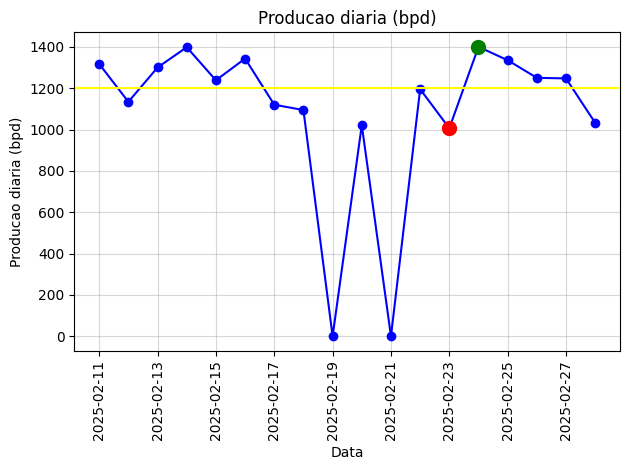

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from datetime import datetime

meta_bpd: float = 1200.0

df: pd.DataFrame = pd.read_excel("relatorio-dez-diaz.xlsx")

datas: List[datetime] = list(df["data"])
producao: List[float] = list(df["prod_dia"])

total_producao: float = 0.0
numero_dias: int = len(producao)

maior_producao: float = producao[0]
menor_producao: float = producao[0]

dias_acima_meta: int = 0
dias_parados: int = 0

idx_max: int = 0
idx_min: int = 0

indice: int = 0
while indice < numero_dias:
    valor: float = producao[indice]

    total_producao = total_producao + valor

    if valor > maior_producao:
        maior_producao = valor
        idx_max = indice

    if valor > 0 and valor < menor_producao:
        menor_producao = valor
        idx_min = indice

    if valor > meta_bpd:
        dias_acima_meta = dias_acima_meta + 1

    if valor == 0:
        dias_parados = dias_parados + 1

    indice = indice + 1

media_producao: float = total_producao / numero_dias

# ======================
# Saidas
# ======================
print("Producao media:", round(media_producao, 2))
print("Maior producao:", maior_producao)
print("Menor producao:", menor_producao)
print("Dias acima da meta:", dias_acima_meta)
print("Dias parados:", dias_parados)

# ======================
# Grafico
# ======================
plt.plot(datas, producao, marker="o", color="blue")
plt.axhline(meta_bpd, color="yellow")

plt.plot(datas[idx_max], producao[idx_max],
         marker="o", markersize=10, color="green")
plt.plot(datas[idx_min], producao[idx_min],
         marker="o", markersize=10, color="red")

plt.xlabel("Data")
plt.ylabel("Producao diaria (bpd)")
plt.title("Producao diaria (bpd)")
plt.xticks(rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("producao_diaria.pdf", dpi=300, bbox_inches="tight")
plt.show()
